## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You should download the data from GitHub in Day2 assessments (Titanic-Dataset.csv) dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [1]:
from IPython.display import clear_output

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
len(df)

891

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


some culoms have Nan value

thereis a some culoms dont have age "Nan" so ill calculate the avareg age

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


survived culoms will be my predction "y" else will be the X

In [14]:
#i wanna know what are my features
#df.index
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


will see we have some colums as obj



<Axes: xlabel='Survived', ylabel='count'>

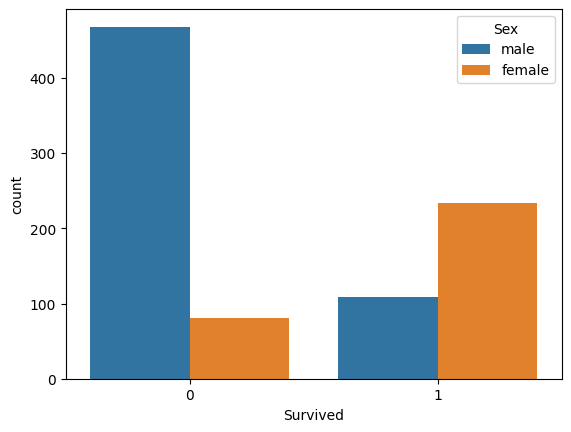

In [24]:



# def check_target_imbalance(df,target_column):
 # print("target Distribution:")
#  print(df[target_column].value_counts(normalize=True))
 # sns.countplot(x=df[target_column])
 # plt.title("Target distrbution")
  #plt.show()
#check_target_imbalance(df,"Survived")




#other easy way
sns.countplot(x='Survived',hue='Sex',data=df)


will see the number of survived is less also more female survived more then the male so the culomn "Sex" is important

In [25]:
df.isna().sum()
#will see how many values are null

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
print( df['Cabin'].isna().sum()/len(df['Cabin'])*100 ) #will drop

print(df['Age'].isna().sum()/len(df['Age'])*100 )


 #i wanna see the persntg of null values, if it is high or not

77.10437710437711
19.865319865319865


In [29]:
#i will find the mean of the age so i can fill the null
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-29-4d5031c0836e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [58]:

#sns.heatmap(df.isna())
df['Age'].isna().sum() #will see if we  still have null values


0

In [59]:
#make new column for gender ( male ,female) into numbrcal 1,0 and drop the "sex" column
#pd.get_dummies(df['Sex'])

df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})
df


KeyError: 'Sex'

In [56]:
df.drop(['Cabin','Ticket','Name','Sex','Embarked'],axis=1,inplace=True) #for raw axis=0

#it showes error if i run it again bc i deleted it permnatly from df

KeyError: "['Cabin', 'Ticket', 'Name', 'Sex', 'Embarked'] not found in axis"

In [60]:
#i will spreate my data

X = df.drop('Survived', axis=1)
y=df['Survived']


In [71]:
#now i will trian and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='rbf'),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "XGBoost Classifier": XGBClassifier(verbosity=0),
   # "CatBoost Classifier": CatBoostClassifier(verbose=0)
}


for model_name, model in models.items():
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []

    # Stratified 5-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        # Split data into training and testing sets
        X_Train, X_Test = X.loc[train_index, :], X.loc[test_index, :]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model.fit(X_Train, y_Train)
        # Predict on the test set
        y_pred = model.predict(X_Test)

        # Calculate metrics
        scores_accuracy.append(accuracy_score(y_Test, y_pred))
        scores_precision.append(precision_score(y_Test, y_pred, average='weighted'))
        scores_recall.append(recall_score(y_Test, y_pred, average='weighted'))
        scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))

    # Print the results
    print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
    print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
    print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
    print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
    print("\n")

Logistic Regression Accuracy: 0.7901
Logistic Regression Precision: 0.7893
Logistic Regression Recall: 0.7901
Logistic Regression F1-Score: 0.7886


Support Vector Machine Accuracy: 0.6521
Support Vector Machine Precision: 0.6922
Support Vector Machine Recall: 0.6521
Support Vector Machine F1-Score: 0.5654


Decision Tree Classifier Accuracy: 0.7935
Decision Tree Classifier Precision: 0.7940
Decision Tree Classifier Recall: 0.7935
Decision Tree Classifier F1-Score: 0.7914


Random Forest Classifier Accuracy: 0.8271
Random Forest Classifier Precision: 0.8265
Random Forest Classifier Recall: 0.8271
Random Forest Classifier F1-Score: 0.8256


XGBoost Classifier Accuracy: 0.8013
XGBoost Classifier Precision: 0.7994
XGBoost Classifier Recall: 0.8013
XGBoost Classifier F1-Score: 0.7996




In [76]:

majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)


baseline_accuracy = accuracy_score(y, baseline_pred)
baseline_precision = precision_score(y, baseline_pred, average='weighted')
baseline_recall = recall_score(y, baseline_pred, average='weighted')
baseline_f1 = f1_score(y, baseline_pred, average='weighted')

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")
print(f"Baseline Precision (majority class): {baseline_precision:.4f}")
print(f"Baseline Recall (majority class): {baseline_recall:.4f}")
print(f"Baseline F1-Score (majority class): {baseline_f1:.4f}")

Baseline Accuracy (majority class): 0.6162
Baseline Precision (majority class): 0.3797
Baseline Recall (majority class): 0.6162
Baseline F1-Score (majority class): 0.4698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


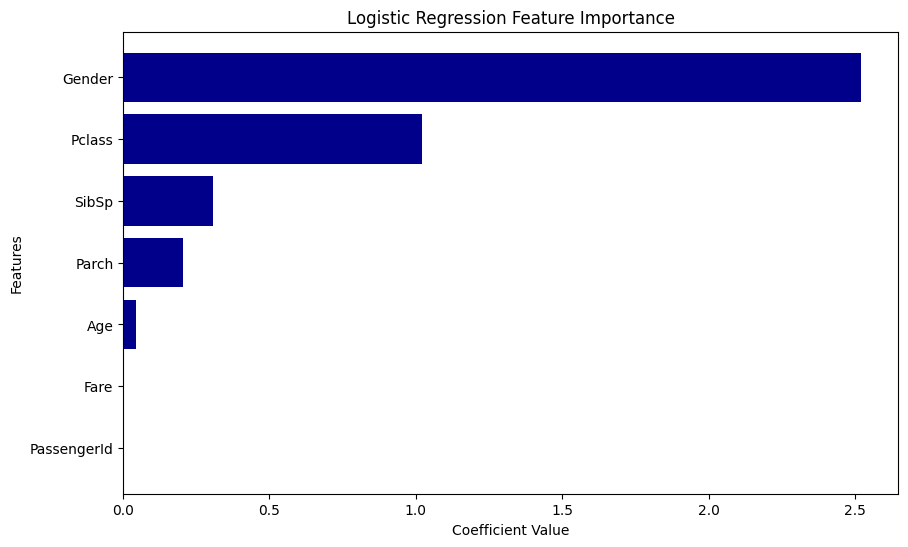

In [77]:

logistic_importance = list(zip(X.columns, models["Logistic Regression"].coef_[0]))
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)


features, coefficients = zip(*sorted_logistic_importance)

plt.figure(figsize=(10, 6))
plt.barh(features, np.abs(coefficients), color='darkblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()


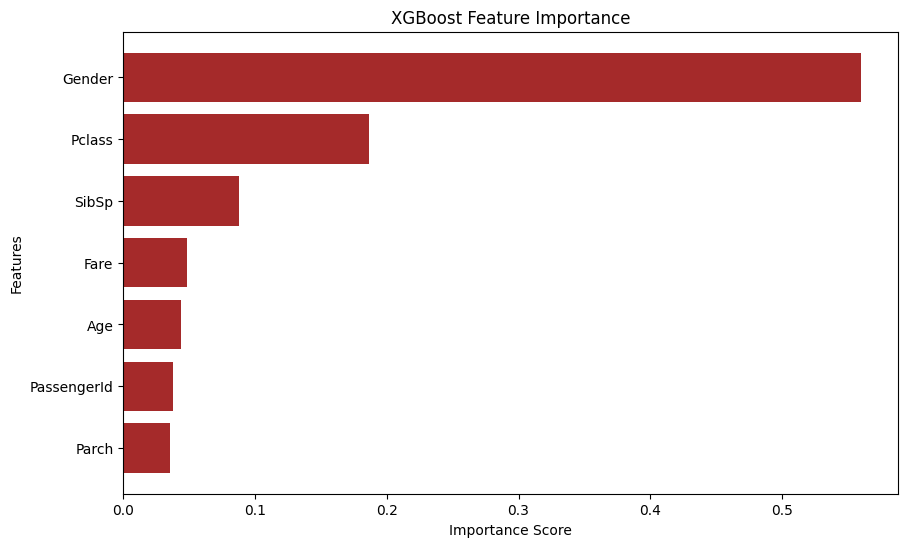

In [78]:

xgb_importances = models["XGBoost Classifier"].feature_importances_


sorted_idx = np.argsort(xgb_importances)[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importances = xgb_importances[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='brown')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [87]:
import numpy as np
from tqdm import tqdm

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_reg_cost(y, y_pred):
    epsilon = 1e-15
    cost = -1 / len(y) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return cost

def log_reg_gradient_descent(X, y, learning_rate, n_iters):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for _ in tqdm(range(n_iters)):

        z = np.dot(X, theta)
        y_pred = sigmoid(z)


        loss = log_reg_cost(y, y_pred)
        losses.append(loss)


        gradient = np.dot(X.T, (y_pred - y)) / m


        theta = theta - learning_rate * gradient

    return theta, losses


In [88]:

learning_rate = 0.01
n_iters = 1000

theta, losses = log_reg_gradient_descent(X, y, learning_rate, n_iters)
print("Optimized Theta:", theta)


  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-87-d80ccaa57ca3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
  2%|▏         | 20/1000 [00:00<00:05, 189.70it/s]<ipython-input-87-d80ccaa57ca3>:5: Run

Optimized Theta: [-0.26259976 -0.95057549 -4.15032429 -0.78868651 -0.03875556  4.29894714
  1.11103357]


In [90]:
print(theta)

[-0.26259976 -0.95057549 -4.15032429 -0.78868651 -0.03875556  4.29894714
  1.11103357]


In [91]:

y_pred = sigmoid(np.dot(X, theta))
y_pred = np.round(y_pred)


correct_mask = (y_pred == y)


correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')

print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)')

The model predicted 587 out of 891 predictions correctly
The Accuracy is 0.6588103254769921 (65.88103254769922%)


In [98]:
print(f"X_test length: {len(X_test)}")
print(f"y_test length: {len(y_test)}")


X_test length: 179
y_test length: 179


In [100]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[103   2]
 [  2  72]]


In [101]:
from sklearn.metrics import confusion_matrix


matrix = confusion_matrix(y_test, y_pred)


tp = matrix[1][1]
fp = matrix[0][1]
fn = matrix[1][0]
tn = matrix[0][0]


precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 / ((1 / precision) + (1 / recall))


print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


Precision: 0.972972972972973
Recall: 0.972972972972973
F1 Score: 0.972972972972973
